<a href="https://colab.research.google.com/github/Mastermind305/TOMATO-LEAF-DISEASE-CLASSIFICATION-BY-DEEP-LEARNING/blob/main/tomato_leaf_vgg_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Models
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D


import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
# from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.vgg16 import VGG16
from keras.models import Model
# from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras import backend
from keras.utils import plot_model
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras.models import Sequential
import matplotlib.pyplot as plt
from glob import glob
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unrar x '/content/drive/MyDrive/tomato/train.rar'
!unrar x '/content/drive/MyDrive/tomato/val.rar'

Streaming output truncated to the last 5000 lines.
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/1001f133-ff3e-48de-b288-5a3802d9f3e1___Com.G_SpM_FL 8621.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/1030a8ae-d4f2-4a36-aac9-c5ca40e5ec03___Com.G_SpM_FL 9295.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/105833d3-690a-44fa-abd7-0a8c6245f7b0___Com.G_SpM_FL 1277.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/10742761-050e-4a3b-b3ef-cbbde8cd6d2a___Com.G_SpM_FL 8445.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/1075cc73-3ea9-47c1-a92d-98cda4b222b7___Com.G_SpM_FL 9467.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mite/11337458-8442-4322-b615-31a57e7a8323___Com.G_SpM_FL 8840.JPG      57%  OK 
Extracting  train/Tomato___Spider_mites Two-spotted_spider_mi

In [6]:
import os
train_path = '/content/train'
test_path = '/content/val'
for dirname, _, filenames in os.walk(train_path):
    print(dirname)

/content/train
/content/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus
/content/train/Tomato___Early_blight
/content/train/Tomato___Target_Spot
/content/train/Tomato___Spider_mites Two-spotted_spider_mite
/content/train/Tomato___Bacterial_spot
/content/train/Tomato___Tomato_mosaic_virus
/content/train/Tomato___Septoria_leaf_spot
/content/train/Tomato___healthy
/content/train/Tomato___Leaf_Mold
/content/train/Tomato___Late_blight


In [7]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
BATCH_SIZE = 32
EPOCHS = 10
RANDOM_SEED = 42

In [10]:
if backend.image_data_format() == 'channels_first':
    INPUT_SHAPE = (3, IMAGE_SIZE[0], IMAGE_SIZE[1])
else:
    INPUT_SHAPE = (IMAGE_SIZE[0], IMAGE_SIZE[1], 3)

print(f'input_shape: {INPUT_SHAPE}')

input_shape: (224, 224, 3)


In [11]:
count_of_classes = len(glob(train_path+'/*'))
print(count_of_classes)

10


In [12]:
# Prepare
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [13]:
#### read directly from directories
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = tuple(IMAGE_SIZE),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = tuple(IMAGE_SIZE),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

plabel = dict((y,x) for x,y in training_set.class_indices.items())


Found 10000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


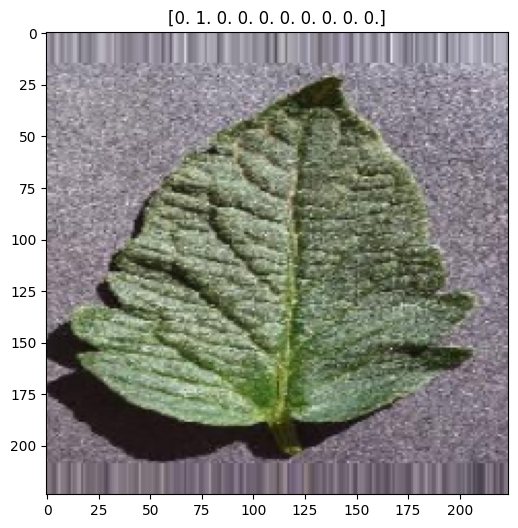

In [14]:

data, label = training_set.next()

plt.figure(figsize=(6, 6))
plt.imshow(data[4])
plt.title(label[2])
plt.show()



In [15]:
###IMPORTING

vgg16 = VGG16(input_shape=INPUT_SHAPE, weights='imagenet', include_top=False)

for layer in vgg16.layers:
    layer.trainable = False

x = Flatten()(vgg16.output)

prediction = Dense(count_of_classes, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')
plot_model(model, show_shapes=True)

model.summary()


58889256/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [16]:

###FIT THE MODEL
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=EPOCHS,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)


<ipython-input-16-9f3c5729f05a>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
313/313 [==============================] - 172s 511ms/step - loss: 0.8961 - accuracy: 0.7021 - val_loss: 0.9922 - val_accuracy: 0.7100
Epoch 2/10
313/313 [==============================] - 154s 493ms/step - loss: 0.4504 - accuracy: 0.8485 - val_loss: 0.6891 - val_accuracy: 0.7910
Epoch 3/10
313/313 [==============================] - 151s 484ms/step - loss: 0.3671 - accuracy: 0.8748 - val_loss: 0.5720 - val_accuracy: 0.8310
Epoch 4/10
313/313 [==============================] - 150s 478ms/step - loss: 0.3184 - accuracy: 0.8922 - val_loss: 0.6324 - val_accuracy: 0.8230
Epoch 5/10
313/313 [==============================] - 148s 473ms/step - loss: 0.2895 - accuracy: 0.9001 - val_loss: 0.8383 - val_accuracy: 0.7720
Epoch 6/10
313/313 [==============================] - 152s 485ms/step - loss: 0.2367 - accuracy: 0.9201 - val_loss: 0.7059 - val_accuracy: 0.8120
Epoch 7/10
313/313 [==============================] - 152s 487ms/step - loss: 0.2324 - accuracy: 0.9191 - val_loss: 0.6198 -

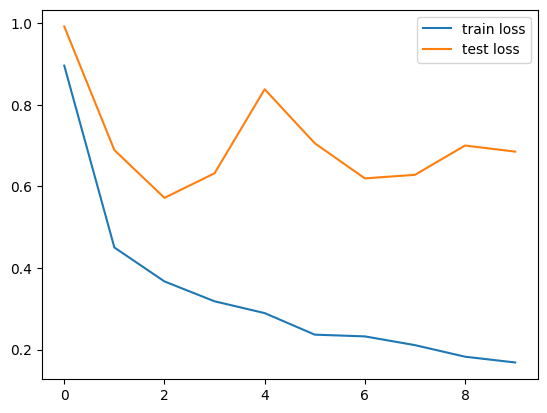

<Figure size 640x480 with 0 Axes>

In [17]:
#TO PLOT THE LOSS AND SHIT
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()
plt.savefig('Loss over Epochs')

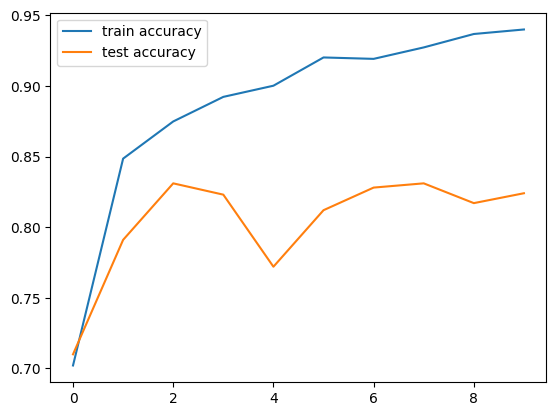

<Figure size 640x480 with 0 Axes>

In [18]:
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='test accuracy')
plt.legend()
plt.show()
plt.savefig('Accuracy over Epochs')

In [19]:
model.save('model_vgg16.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
